# Salmonella Typhimurium USA population analysis

In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from matplotlib.pyplot import figure
from PIL import Image
import io
pd.set_option('display.max_columns', 300)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# MLST data

In [2]:
# Import in the mlst data 

file1 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/salmonellast_output.csv'
data1 = pd.read_csv(file1, header=0, na_values='Nothing')

In [3]:
# Check for missing values

data1.isnull().sum()

FILE               0
SCHEME             0
ST                 0
aroC               0
dnaN               0
hemD               0
hisD               0
purE               0
sucA               0
thrA               0
Unnamed: 10    21521
Unnamed: 11    21531
Unnamed: 12    21533
Unnamed: 13    21533
Unnamed: 14    21533
Unnamed: 15    21533
dtype: int64

In [4]:
# Check the shape of the data

data1.shape

(21534, 16)

In [5]:
# Check the data types 

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21534 entries, 0 to 21533
Data columns (total 16 columns):
FILE           21534 non-null object
SCHEME         21534 non-null object
ST             21534 non-null object
aroC           21534 non-null object
dnaN           21534 non-null object
hemD           21534 non-null object
hisD           21534 non-null object
purE           21534 non-null object
sucA           21534 non-null object
thrA           21534 non-null object
Unnamed: 10    13 non-null float64
Unnamed: 11    3 non-null float64
Unnamed: 12    1 non-null float64
Unnamed: 13    1 non-null float64
Unnamed: 14    1 non-null float64
Unnamed: 15    1 non-null float64
dtypes: float64(6), object(10)
memory usage: 2.6+ MB


In [6]:
# Check the first few observations

data1.head()

,FILE,SCHEME,ST,aroC,dnaN,hemD,hisD,purE,sucA,thrA,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,../data_tmp/DRR006255.fasta,senterica,19,10,7,12,9,5,9,2,NaN,NaN,NaN,NaN,NaN,NaN
1,../data_tmp/DRR006256.fasta,senterica,19,10,7,12,9,5,9,2,NaN,NaN,NaN,NaN,NaN,NaN
2,../data_tmp/DRR006257.fasta,senterica,-,10,7,12,9,879?,9,2,NaN,NaN,NaN,NaN,NaN,NaN
3,../data_tmp/DRR006258.fasta,senterica,19,10,7,12,9,5,9,2,NaN,NaN,NaN,NaN,NaN,NaN
4,../data_tmp/DRR006259.fasta,senterica,19,10,7,12,9,5,9,2,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check the last observations

data1.tail()

,FILE,SCHEME,ST,aroC,dnaN,hemD,hisD,purE,sucA,thrA,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
21529,../data_tmp/SRR9989258.fasta,senterica,36,18,14,12,9,5,18,21,NaN,NaN,NaN,NaN,NaN,NaN
21530,../data_tmp/SRR9989260.fasta,senterica,34,10,19,12,9,5,9,2,NaN,NaN,NaN,NaN,NaN,NaN
21531,../data_tmp/SRR9989264.fasta,senterica,19,10,7,12,9,5,9,2,NaN,NaN,NaN,NaN,NaN,NaN
21532,../data_tmp/SRR9989267.fasta,senterica,19,10,7,12,9,5,9,2,NaN,NaN,NaN,NaN,NaN,NaN
21533,../data_tmp/SRR9992707.fasta,senterica,34,10,19,12,9,5,9,2,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Select columns

sel_cols = ['FILE', 'SCHEME', 'ST', 'aroC', 'dnaN', 'hemD', 'hisD', 'purE', 'sucA', 'thrA']

data2 = data1[sel_cols]
data2.head()

,FILE,SCHEME,ST,aroC,dnaN,hemD,hisD,purE,sucA,thrA
0,../data_tmp/DRR006255.fasta,senterica,19,10,7,12,9,5,9,2
1,../data_tmp/DRR006256.fasta,senterica,19,10,7,12,9,5,9,2
2,../data_tmp/DRR006257.fasta,senterica,-,10,7,12,9,879?,9,2
3,../data_tmp/DRR006258.fasta,senterica,19,10,7,12,9,5,9,2
4,../data_tmp/DRR006259.fasta,senterica,19,10,7,12,9,5,9,2


In [9]:
# Split the file column

data2['id1'] = data2['FILE'].str.split('/').str[2]
data2.head()

/home/joaocarlosgomesneto/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,FILE,SCHEME,ST,aroC,dnaN,hemD,hisD,purE,sucA,thrA,id1
0,../data_tmp/DRR006255.fasta,senterica,19,10,7,12,9,5,9,2,DRR006255.fasta
1,../data_tmp/DRR006256.fasta,senterica,19,10,7,12,9,5,9,2,DRR006256.fasta
2,../data_tmp/DRR006257.fasta,senterica,-,10,7,12,9,879?,9,2,DRR006257.fasta
3,../data_tmp/DRR006258.fasta,senterica,19,10,7,12,9,5,9,2,DRR006258.fasta
4,../data_tmp/DRR006259.fasta,senterica,19,10,7,12,9,5,9,2,DRR006259.fasta


In [10]:
# Split the id1 column to get the id column

data2['id'] = data2['id1'].str.split('.').str[0]
data2.head()

/home/joaocarlosgomesneto/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,FILE,SCHEME,ST,aroC,dnaN,hemD,hisD,purE,sucA,thrA,id1,id
0,../data_tmp/DRR006255.fasta,senterica,19,10,7,12,9,5,9,2,DRR006255.fasta,DRR006255
1,../data_tmp/DRR006256.fasta,senterica,19,10,7,12,9,5,9,2,DRR006256.fasta,DRR006256
2,../data_tmp/DRR006257.fasta,senterica,-,10,7,12,9,879?,9,2,DRR006257.fasta,DRR006257
3,../data_tmp/DRR006258.fasta,senterica,19,10,7,12,9,5,9,2,DRR006258.fasta,DRR006258
4,../data_tmp/DRR006259.fasta,senterica,19,10,7,12,9,5,9,2,DRR006259.fasta,DRR006259


In [11]:
# Subset data2 to get the columns we need

sel_columns = ['ST', 'aroC', 'dnaN', 'hemD', 'hisD', 'purE', 'sucA', 'thrA', 'id']
data3 = data2[sel_columns]
data3.head()

,ST,aroC,dnaN,hemD,hisD,purE,sucA,thrA,id
0,19,10,7,12,9,5,9,2,DRR006255
1,19,10,7,12,9,5,9,2,DRR006256
2,-,10,7,12,9,879?,9,2,DRR006257
3,19,10,7,12,9,5,9,2,DRR006258
4,19,10,7,12,9,5,9,2,DRR006259


In [12]:
d4 = data3[(data3['ST'] == '19') | (data3['ST'] == '34')]
pd.crosstab(d4['ST'], d4['thrA'])

thrA,2
ST,
19,12477
34,5274


In [13]:
# Check the shape of data3

data3.shape

(21534, 9)

In [14]:
# Check data information

data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21534 entries, 0 to 21533
Data columns (total 9 columns):
ST      21534 non-null object
aroC    21534 non-null object
dnaN    21534 non-null object
hemD    21534 non-null object
hisD    21534 non-null object
purE    21534 non-null object
sucA    21534 non-null object
thrA    21534 non-null object
id      21534 non-null object
dtypes: object(9)
memory usage: 1.5+ MB


# SISTR data

In [15]:
# Import in the sistr data

file2 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/sistr_all.csv'
data4 = pd.read_csv(file2, header=0, na_values='Nothing')

In [16]:
# Check the shape of the data 

data4.shape

(21534, 16)

In [17]:
# Check data infor

data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21534 entries, 0 to 21533
Data columns (total 16 columns):
cgmlst_ST                  19226 non-null float64
cgmlst_distance            21534 non-null float64
cgmlst_genome_match        21524 non-null object
cgmlst_matching_alleles    21534 non-null int64
cgmlst_subspecies          21460 non-null object
fasta_filepath             21534 non-null object
genome                     21534 non-null object
h1                         21534 non-null object
h2                         21534 non-null object
o_antigen                  21534 non-null object
qc_messages                190 non-null object
qc_status                  21534 non-null object
serogroup                  21534 non-null object
serovar                    21534 non-null object
serovar_antigen            21534 non-null object
serovar_cgmlst             21524 non-null object
dtypes: float64(2), int64(1), object(13)
memory usage: 2.6+ MB


In [18]:
# Check the first observations

data4.head()

,cgmlst_ST,cgmlst_distance,cgmlst_genome_match,cgmlst_matching_alleles,cgmlst_subspecies,fasta_filepath,genome,h1,h2,o_antigen,qc_messages,qc_status,serogroup,serovar,serovar_antigen,serovar_cgmlst
0,NaN,0.027273,SAL_DA6706AA,321,enterica,/lustre/work/benson/netogomes/pegasus/typhimur...,DRR006255,i,"1,2","1,4,[5],12",NaN,PASS,B,Typhimurium,Typhimurium,Typhimurium
1,NaN,0.030303,SAL_CA0068AA,320,enterica,/lustre/work/benson/netogomes/pegasus/typhimur...,DRR006256,i,"1,2","1,4,[5],12",NaN,PASS,B,Typhimurium,Typhimurium,Typhimurium
2,NaN,0.027273,SAL_DA6536AA,321,enterica,/lustre/work/benson/netogomes/pegasus/typhimur...,DRR006257,i,"1,2","1,4,[5],12",NaN,PASS,B,Typhimurium,Typhimurium,Typhimurium
3,NaN,0.027273,84420,321,enterica,/lustre/work/benson/netogomes/pegasus/typhimur...,DRR006258,i,"1,2","1,4,[5],12",NaN,PASS,B,Typhimurium,Typhimurium,Typhimurium
4,NaN,0.030303,SAL_FA3144AA,320,enterica,/lustre/work/benson/netogomes/pegasus/typhimur...,DRR006259,i,"1,2","1,4,[5],12",NaN,PASS,B,Typhimurium,Typhimurium,Typhimurium


In [19]:
# Change genome column label to id

data4 = data4.rename(columns={"genome": "id"})
data4.columns

Index(['cgmlst_ST', 'cgmlst_distance', 'cgmlst_genome_match',
       'cgmlst_matching_alleles', 'cgmlst_subspecies', 'fasta_filepath', 'id',
       'h1', 'h2', 'o_antigen', 'qc_messages', 'qc_status', 'serogroup',
       'serovar', 'serovar_antigen', 'serovar_cgmlst'],
      dtype='object')

# Merge mlst and SISTR data

In [20]:
# Merge all datasets on id

data5 = pd.merge(data3, data4, on = 'id')
data5.head()

,ST,aroC,dnaN,hemD,hisD,purE,sucA,thrA,id,cgmlst_ST,cgmlst_distance,cgmlst_genome_match,cgmlst_matching_alleles,cgmlst_subspecies,fasta_filepath,h1,h2,o_antigen,qc_messages,qc_status,serogroup,serovar,serovar_antigen,serovar_cgmlst
0,19,10,7,12,9,5,9,2,DRR006255,NaN,0.027273,SAL_DA6706AA,321,enterica,/lustre/work/benson/netogomes/pegasus/typhimur...,i,"1,2","1,4,[5],12",NaN,PASS,B,Typhimurium,Typhimurium,Typhimurium
1,19,10,7,12,9,5,9,2,DRR006256,NaN,0.030303,SAL_CA0068AA,320,enterica,/lustre/work/benson/netogomes/pegasus/typhimur...,i,"1,2","1,4,[5],12",NaN,PASS,B,Typhimurium,Typhimurium,Typhimurium
2,-,10,7,12,9,879?,9,2,DRR006257,NaN,0.027273,SAL_DA6536AA,321,enterica,/lustre/work/benson/netogomes/pegasus/typhimur...,i,"1,2","1,4,[5],12",NaN,PASS,B,Typhimurium,Typhimurium,Typhimurium
3,19,10,7,12,9,5,9,2,DRR006258,NaN,0.027273,84420,321,enterica,/lustre/work/benson/netogomes/pegasus/typhimur...,i,"1,2","1,4,[5],12",NaN,PASS,B,Typhimurium,Typhimurium,Typhimurium
4,19,10,7,12,9,5,9,2,DRR006259,NaN,0.030303,SAL_FA3144AA,320,enterica,/lustre/work/benson/netogomes/pegasus/typhimur...,i,"1,2","1,4,[5],12",NaN,PASS,B,Typhimurium,Typhimurium,Typhimurium


In [21]:
# Check the shape of the merged data

data5.shape

(21534, 24)

In [22]:
# Check ST counts

data5['ST'].value_counts()

19      12477
34       5274
313      1493
36        835
-         225
        ...  
3662        1
3046        1
4862        1
139         1
28          1
Name: ST, Length: 242, dtype: int64

In [23]:
# ST vs serovar

pd.crosstab(data5['serovar'], data5['ST'])

ST,-,1,10,11,112,118,1208,126,128,13,137,138,139,14,142,145,1479,15,1515,152,1524,1543,1544,1561,159,16,1628,1649,1681,1805,181,1818,185,19,1921,1969,198,1986,2,2017,2040,2066,2067,2068,2071,2072,2073,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2088,2089,2094,2103,2105,2111,213,2152,2168,2177,2186,22,2210,2212,2214,2215,2247,2265,2297,23,2330,2379,2392,24,241,2458,249,254,2540,2562,2609,27,279,28,2864,2866,29,2921,2932,2939,2956,2988,2998,302,3027,3032,3046,3048,308,309,31,3119,313,3137,3175,32,321,3228,323,3235,3239,328,329,33,3343,34,3405,3412,3438,3478,3501,3524,3566,3588,3590,36,3630,3631,3662,367,376,3761,3804,3950,3975,3980,40,4036,4067,4081,413,4176,4207,421,423,4262,4281,4283,429,4298,4299,43,4301,4304,4358,4431,4448,4475,4476,4487,45,4556,4605,4620,4645,4655,467,4734,4770,4808,4828,4854,4862,4877,4883,49,4920,4921,4926,4927,4937,4956,4991,4995,5,50,5002,5007,5017,5041,5042,5058,5060,513,5139,515,516,5237,5239,5297,5301,5317,5406,5408,548,5526,5546,5650,568,5809,5833,5876,592,603,639,64,65,654,680,684,71,74,78,814,85,86,88,885,909,95,96,98,99
serovar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-:-:-,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Aberdeen|Aesch|Alger|Amager|Aminatu|Anfo|Asylanta|Atento|Ati|Augustenborg|Bardo|Bazenheid|Bergedorf|Bonames|Bournemouth|Brazzaville|Bruebach|Bsilla|Chile|Chingola|Coeln|Concord|Crossness|Cuckmere|Dapango|Detmold|Diourbel|Djelfa|Doorn|Echa|Farcha|Fass|Fayed|Freiburg|Fyris|Gabon|Galiema|Gallen|Giza|Gori|Grandhaven|Graz|Guildford|Haifa|Handen|Hannover|Harcourt|Heidelberg|Hilversum|Hissar|Hull|Ibaragi|Jubilee|Kalina|Kallo|Karamoja|Keurmassar|Kirkee|Kisangani|Kisii|Kolda|Kunduchi|Lamphun|Landau|Larochelle|Ligeo|Lindenburg|Litchfield|Livulu|Lode|Lokstedt|Louga|Maastricht|Malakal|Marylebone|Matopeni|Mbao|Menden|Mendoza|Meskin|Mgulani|Millesi|Montaigu|Morotai|Muenchen|Mulhouse|Nchanga|Ndjamena|Nessa|Newport|Okerara|Oldenburg|Onarimon|Oskarshamn|Overvecht|Pakistan|Paratyphi B|Paratyphi B var. Java|Pretoria|Richmond|Rogy|Rumford|Sada|Saintpaul|Sandaga|Seegefeld|Shubra|Skansen|Stanley|Staoueli|Stendal|Stormont|Stratford|Szentes|Thetford|Thiaroye|Tiko|Tilene|Tours|Typhimurium|Umbadah|Valdosta|Vejle|Virchow|Virginia|Wandsworth|Wenatchee|Wentworth|Westerstede|Wimborne|Windsheim|Wingrove|Yarm|Yoff|Zerifin|IIIb 6,7,14:z39:1,2|II 38:b:1,2|II 41:z10:1,2|II 42:z10:1,2|II 48:d:1,2",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Agama,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0
Agona,0,0,0,0,0,0,0,

In [24]:
a = data5[data5['serovar'] == 'I 4,[5],12:i:-']

In [25]:
a['ST'].value_counts()

34      4950
19       308
-         49
2379      10
3478       6
2105       6
4431       5
36         5
3228       4
5301       4
99         2
5007       2
5002       2
3119       1
1681       1
4067       1
4734       1
5408       1
4995       1
3235       1
2956       1
2078       1
5809       1
3501       1
4081       1
5239       1
2079       1
4281       1
4877       1
Name: ST, dtype: int64

# Group 1-20 Baps analysis

In [26]:
# Import in the baps_1 group1-20 data 

file3 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/roary_output_gr1.fastbaps_l6.csv'
file4 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/roary_output_gr2.fastbaps_l6.csv'
file5 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/roary_output_gr3.fastbaps_l6.csv'
file6 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/roary_output_gr4.fastbaps_l6.csv'
file7 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/roary_output_gr5.fastbaps_l6.csv'
file8 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/roary_output_gr6.fastbaps_l6.csv'
file9 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/roary_output_gr7.fastbaps_l6.csv'
file10 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/roary_output_gr8.fastbaps_l6.csv'
file11 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/roary_output_gr9.fastbaps_l6.csv'
file12 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/roary_output_gr10.fastbaps_l6.csv'
file13 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/roary_output_gr11.fastbaps_l6.csv'
file14 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/roary_output_gr12.fastbaps_l6.csv'
file15 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/roary_output_gr13.fastbaps_l6.csv'
file16 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/roary_output_gr14.fastbaps_l6.csv'
file17 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/roary_output_gr15.fastbaps_l6.csv'
file18 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/roary_output_gr16.fastbaps_l6.csv'
file19 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/roary_output_gr17.fastbaps_l6.csv'
file20 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/roary_output_gr18.fastbaps_l6.csv'
file21 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/roary_output_gr19.fastbaps_l6.csv'
file22 = '/home/joaocarlosgomesneto/BacPopGen_paper/salmonella_typhimurium/data/roary_output_gr20.fastbaps_l6.csv'

# Enter the data

data6 = pd.read_csv(file3, header=0, na_values='Nothing')
data7 = pd.read_csv(file4, header=0, na_values='Nothing')
data8 = pd.read_csv(file5, header=0, na_values='Nothing')
data9 = pd.read_csv(file6, header=0, na_values='Nothing')
data10 = pd.read_csv(file7, header=0, na_values='Nothing')
data11 = pd.read_csv(file8, header=0, na_values='Nothing')
data12 = pd.read_csv(file9, header=0, na_values='Nothing')
data13 = pd.read_csv(file10, header=0, na_values='Nothing')
data14 = pd.read_csv(file11, header=0, na_values='Nothing')
data15 = pd.read_csv(file12, header=0, na_values='Nothing')
data16 = pd.read_csv(file13, header=0, na_values='Nothing')
data17 = pd.read_csv(file14, header=0, na_values='Nothing')
data18 = pd.read_csv(file15, header=0, na_values='Nothing')
data19 = pd.read_csv(file16, header=0, na_values='Nothing')
data20 = pd.read_csv(file17, header=0, na_values='Nothing')
data21 = pd.read_csv(file18, header=0, na_values='Nothing')
data22 = pd.read_csv(file19, header=0, na_values='Nothing')
data23 = pd.read_csv(file20, header=0, na_values='Nothing')
data24 = pd.read_csv(file21, header=0, na_values='Nothing')
data25 = pd.read_csv(file22, header=0, na_values='Nothing')

In [27]:
# Creating a new column for all datasets to identify the subsetted dataset 

data6['data_set'] = 'subset_1'
data7['data_set'] = 'subset_2'
data8['data_set'] = 'subset_3'
data9['data_set'] = 'subset_4'
data10['data_set'] = 'subset_5'
data11['data_set'] = 'subset_6'
data12['data_set'] = 'subset_7'
data13['data_set'] = 'subset_8'
data14['data_set'] = 'subset_9'
data15['data_set'] = 'subset_10'
data16['data_set'] = 'subset_11'
data17['data_set'] = 'subset_12'
data18['data_set'] = 'subset_13'
data19['data_set'] = 'subset_14'
data20['data_set'] = 'subset_15'
data21['data_set'] = 'subset_16'
data22['data_set'] = 'subset_17'
data23['data_set'] = 'subset_18'
data24['data_set'] = 'subset_19'
data25['data_set'] = 'subset_20'

In [28]:
# Merge multiple datasets

dfs = [data6, data7, data8, data9, data10, data11, data12, data13, data14, data15, data16, data17,
      data18, data19, data20, data21, data22, data23, data24, data25]

# Check the length of the list to make sure

len(dfs)

20

In [29]:
# Merge multiple datasets together

data26 = pd.concat(dfs)
data26.head()

,Isolates,Level 1,Level 2,Level 3,Level 4,Level 5,Level 6,data_set
0,DRR106950,5,23,59,111,163,197,subset_1
1,ERR023784,5,17,34,54,69,69,subset_1
2,ERR023837,5,21,53,97,135,149,subset_1
3,ERR024361,5,20,47,81,105,115,subset_1
4,ERR024365,5,20,48,82,106,116,subset_1


In [30]:
# Check the shape of the data

data26.shape

(21534, 8)

In [31]:
# Change the column name Isolates to id

data26 = data26.rename(columns = {'Isolates': 'id'})
print(data26.head())
print(data26.shape)

          id  Level 1  Level 2  Level 3  Level 4  Level 5  Level 6  data_set
0  DRR106950        5       23       59      111      163      197  subset_1
1  ERR023784        5       17       34       54       69       69  subset_1
2  ERR023837        5       21       53       97      135      149  subset_1
3  ERR024361        5       20       47       81      105      115  subset_1
4  ERR024365        5       20       48       82      106      116  subset_1
(21534, 8)


# Now let's merge all baps files with the original data5 file

In [32]:
# Merging two datasets based on ids

data27 = pd.merge(data5, data26, on = 'id')
data27.shape

(21534, 31)

In [33]:
# Check the first few observations

data27.head()

,ST,aroC,dnaN,hemD,hisD,purE,sucA,thrA,id,cgmlst_ST,cgmlst_distance,cgmlst_genome_match,cgmlst_matching_alleles,cgmlst_subspecies,fasta_filepath,h1,h2,o_antigen,qc_messages,qc_status,serogroup,serovar,serovar_antigen,serovar_cgmlst,Level 1,Level 2,Level 3,Level 4,Level 5,Level 6,data_set
0,19,10,7,12,9,5,9,2,DRR006255,NaN,0.027273,SAL_DA6706AA,321,enterica,/lustre/work/benson/netogomes/pegasus/typhimur...,i,"1,2","1,4,[5],12",NaN,PASS,B,Typhimurium,Typhimurium,Typhimurium,4,22,51,102,173,241,subset_13
1,19,10,7,12,9,5,9,2,DRR006256,NaN,0.030303,SAL_CA0068AA,320,enterica,/lustre/work/benson/netogomes/pegasus/typhimur...,i,"1,2","1,4,[5],12",NaN,PASS,B,Typhimurium,Typhimurium,Typhimurium,4,15,40,75,90,97,subset_4
2,-,10,7,12,9,879?,9,2,DRR006257,NaN,0.027273,SAL_DA6536AA,321,enterica,/lustre/work/benson/netogomes/pegasus/typhimur...,i,"1,2","1,4,[5],12",NaN,PASS,B,Typhimurium,Typhimurium,Typhimurium,5,18,39,67,105,147,subset_14
3,19,10,7,12,9,5,9,2,DRR006258,NaN,0.027273,84420,321,enterica,/lustre/work/benson/netogomes/pegasus/typhimur...,i,"1,2","1,4,[5],12",NaN,PASS,B,Typhimurium,Typhimurium,Typhimurium,4,15,40,75,90,97,subset_4
4,19,10,7,12,9,5,9,2,DRR006259,NaN,0.030303,SAL_FA3144AA,320,enterica,/lustre/work/benson/netogomes/pegasus/typhimur...,i,"1,2","1,4,[5],12",NaN,PASS,B,Typhimurium,Typhimurium,Typhimurium,5,13,33,53,73,97,subset_8


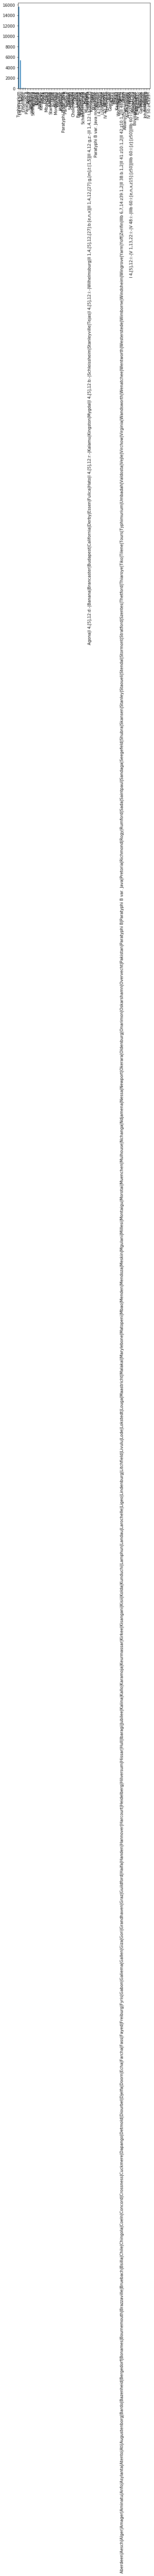

In [34]:
# Check the serovar calls

data27.serovar.value_counts().plot(kind = 'bar')

In [36]:
# Check the names of serovars

data27['serovar'].value_counts()

Typhimurium       15619
I 4,[5],12:i:-     5369
Typhi               106
Enteritidis         103
-:-:-                77
                  ...  
Richmond              1
Kisangani             1
Chester               1
Manchester            1
Idikan                1
Name: serovar, Length: 82, dtype: int64

In [35]:
data27.columns

Index(['ST', 'aroC', 'dnaN', 'hemD', 'hisD', 'purE', 'sucA', 'thrA', 'id',
       'cgmlst_ST', 'cgmlst_distance', 'cgmlst_genome_match',
       'cgmlst_matching_alleles', 'cgmlst_subspecies', 'fasta_filepath', 'h1',
       'h2', 'o_antigen', 'qc_messages', 'qc_status', 'serogroup', 'serovar',
       'serovar_antigen', 'serovar_cgmlst', 'Level 1', 'Level 2', 'Level 3',
       'Level 4', 'Level 5', 'Level 6', 'data_set'],
      dtype='object')

# Filtering out serovars labeled as Typhimurium and I 4,[5],12:i:-

Here, we are filtering out only the genomes classified as Typhimurium and I 4,[5],12:i:- (Typhimurium - monophasic). What is happening
here is that SISTR uses genotypic information to classify the genomes into serovars. That can be very accurate, and we are not 
disputing that here. The consequence of doing that is that you may have misclassifications. That is, the entire collection of genomes 
was expected to be biphasic or monophasic Typhimurium, but it might be something else. Since we cannot ascertain if those miscalls are 
true or not, in our approach we filter them out.

But before filtering let's make sure that we get the same number of serovars in different columns containing that information. 

In [36]:
# Let's filter out those two serovars

data28 = data27[(data27['serovar'] == 'Typhimurium') | (data27['serovar'] == 'I 4,[5],12:i:-')]

In [37]:
# Check the shape of the data

data28.shape

(20988, 31)

In [38]:
# Check the information

data28.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20988 entries, 0 to 21533
Data columns (total 31 columns):
ST                         20988 non-null object
aroC                       20988 non-null object
dnaN                       20988 non-null object
hemD                       20988 non-null object
hisD                       20988 non-null object
purE                       20988 non-null object
sucA                       20988 non-null object
thrA                       20988 non-null object
id                         20988 non-null object
cgmlst_ST                  18817 non-null float64
cgmlst_distance            20988 non-null float64
cgmlst_genome_match        20988 non-null object
cgmlst_matching_alleles    20988 non-null int64
cgmlst_subspecies          20988 non-null object
fasta_filepath             20988 non-null object
h1                         20988 non-null object
h2                         20988 non-null object
o_antigen                  20988 non-null object
qc_messa

In [40]:
# Now let's make sure that all three columns above agree in the serovar call

# Create a list containing the conditions to be checked
conditions = [
    (data28['serovar'] == 'Typhimurium') & (data28['serovar_antigen'] == 'Typhimurium') & (data28['serovar_antigen'] == 'Typhimurium'),
    (data28['serovar'] == 'I 4,[5],12:i:-') & (data28['serovar_antigen'] == 'I 4,[5],12:i:-') & (data28['serovar_antigen'] == 'I 4,[5],12:i:-')]

# Create a list of choices to be made (Typhimurium = 0, and I 4,[5],12:i:- = 1)
choices = ['Biphasic', 'Monophasic']

# Use numpy to do the selection

data28['serovar_call'] = np.select(conditions, choices, default= 'Neither') #default 2 here is if it does come out as either 0 or 1
data28.head()

/home/joaocarlosgomesneto/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,ST,aroC,dnaN,hemD,hisD,purE,sucA,thrA,id,cgmlst_ST,cgmlst_distance,cgmlst_genome_match,cgmlst_matching_alleles,cgmlst_subspecies,fasta_filepath,h1,h2,o_antigen,qc_messages,qc_status,serogroup,serovar,serovar_antigen,serovar_cgmlst,Level 1,Level 2,Level 3,Level 4,Level 5,Level 6,data_set,serovar_call
0,19,10,7,12,9,5,9,2,DRR006255,NaN,0.027273,SAL_DA6706AA,321,enterica,/lustre/work/benson/netogomes/pegasus/typhimur...,i,"1,2","1,4,[5],12",NaN,PASS,B,Typhimurium,Typhimurium,Typhimurium,4,22,51,102,173,241,subset_13,Biphasic
1,19,10,7,12,9,5,9,2,DRR006256,NaN,0.030303,SAL_CA0068AA,320,enterica,/lustre/work/benson/netogomes/pegasus/typhimur...,i,"1,2","1,4,[5],12",NaN,PASS,B,Typhimurium,Typhimurium,Typhimurium,4,15,40,75,90,97,subset_4,Biphasic
2,-,10,7,12,9,879?,9,2,DRR006257,NaN,0.027273,SAL_DA6536AA,321,enterica,/lustre/work/benson/netogomes/pegasus/typhimur...,i,"1,2","1,4,[5],12",NaN,PASS,B,Typhimurium,Typhimurium,Typhimurium,5,18,39,67,105,147,subset_14,Biphasic
3,19,10,7,12,9,5,9,2,DRR006258,NaN,0.027273,84420,321,enterica,/lustre/work/benson/netogomes/pegasus/typhimur...,i,"1,2","1,4,[5],12",NaN,PASS,B,Typhimurium,Typhimurium,Typhimurium,4,15,40,75,90,97,subset_4,Biphasic
4,19,10,7,12,9,5,9,2,DRR006259,NaN,0.030303,SAL_FA3144AA,320,enterica,/lustre/work/benson/netogomes/pegasus/typhimur...,i,"1,2","1,4,[5],12",NaN,PASS,B,Typhimurium,Typhimurium,Typhimurium,5,13,33,53,73,97,subset_8,Biphasic


In [41]:
# Let's check the value counts to make sure we only have 0 or 1

data28['serovar_call'].value_counts()

Biphasic      15322
Monophasic     4917
Neither         749
Name: serovar_call, dtype: int64

In [42]:
data28['serovar'].value_counts()

Typhimurium       15619
I 4,[5],12:i:-     5369
Name: serovar, dtype: int64

In [43]:
data28['serovar_antigen'].value_counts()

Typhimurium                                                                                                               15772
I 4,[5],12:i:-                                                                                                             5159
Aberdeen|Augustenborg|Cuckmere|Diourbel|Doorn|Landau|Lindenburg|Mbao|Mgulani|Stratford|Typhimurium                           34
I 1,4,12,27:g,m:1,2                                                                                                           7
I 1,4,12,27:i:1,2,7                                                                                                           4
Paratyphi B|Paratyphi B var. Java                                                                                             3
Coeln|Fyris|Haifa|Heidelberg|Kisangani|Kunduchi|Paratyphi B|Paratyphi B var. Java|Saintpaul|Shubra|Stanley|Typhimurium        3
I 9,46:g,m:1,2                                                                                          

In [44]:
data28['serovar_cgmlst'].value_counts()

Typhimurium       15618
I 4,[5],12:i:-     5369
Saintpaul             1
Name: serovar_cgmlst, dtype: int64

# For simplicity, we are filtering only the rows classified as 0 or 1. Since this is a demonstration project, we don't expect that this will affect our final conclusions.

In [45]:
# Filter out serovar_call classified as 0 or 1

data29 = data28[data28['serovar_call'] != 'Neither']
print(data28.shape)
print(data29.shape)

(20988, 32)
(20239, 32)


In [46]:
# Confirming that the correct subset was selected

data29['serovar_call'].value_counts()

Biphasic      15322
Monophasic     4917
Name: serovar_call, dtype: int64

In [47]:
# Checking for missing values

data29.isnull().sum()

ST                             0
aroC                           0
dnaN                           0
hemD                           0
hisD                           0
purE                           0
sucA                           0
thrA                           0
id                             0
cgmlst_ST                   2023
cgmlst_distance                0
cgmlst_genome_match            0
cgmlst_matching_alleles        0
cgmlst_subspecies              0
fasta_filepath                 0
h1                             0
h2                             0
o_antigen                      0
qc_messages                20190
qc_status                      0
serogroup                      0
serovar                        0
serovar_antigen                0
serovar_cgmlst                 0
Level 1                        0
Level 2                        0
Level 3                        0
Level 4                        0
Level 5                        0
Level 6                        0
data_set  

In [48]:
# Filtering important columns 

variablesNeeded = ['ST', 'cgmlst_ST', 'serovar_call', 'Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5', 'Level 6', 'data_set']

# Filter columns

data30 = data29[variablesNeeded]

In [49]:
data30.head()

,ST,cgmlst_ST,serovar_call,Level 1,Level 2,Level 3,Level 4,Level 5,Level 6,data_set
0,19,NaN,Biphasic,4,22,51,102,173,241,subset_13
1,19,NaN,Biphasic,4,15,40,75,90,97,subset_4
2,-,NaN,Biphasic,5,18,39,67,105,147,subset_14
3,19,NaN,Biphasic,4,15,40,75,90,97,subset_4
4,19,NaN,Biphasic,5,13,33,53,73,97,subset_8


In [50]:
# Renaming level columns appropriately

bapsNames = {'Level 1': 'Baps1', 'Level 2': 'Baps2', 'Level 3': 'Baps3', 'Level 4': 'Baps4', 'Level 5': 'Baps5', 'Level 6': 'Baps6'}
data30 = data30.rename(columns = bapsNames)

In [51]:
data30.head()

,ST,cgmlst_ST,serovar_call,Baps1,Baps2,Baps3,Baps4,Baps5,Baps6,data_set
0,19,NaN,Biphasic,4,22,51,102,173,241,subset_13
1,19,NaN,Biphasic,4,15,40,75,90,97,subset_4
2,-,NaN,Biphasic,5,18,39,67,105,147,subset_14
3,19,NaN,Biphasic,4,15,40,75,90,97,subset_4
4,19,NaN,Biphasic,5,13,33,53,73,97,subset_8


# Checking for unwanted characters in each column (characters such as - or ?)

## ST checking

In [52]:
# Checking for hyphens (I have checked for ?, and there are none)

print(data30['ST'].str.contains('-').sum())
#print(data30['ST'].str.contains('?'))
# 135 cells for the ST column containing hyphen

135


In [53]:
# Check the rows for it

data30.query('ST.str.contains("-")')

,ST,cgmlst_ST,serovar_call,Baps1,Baps2,Baps3,Baps4,Baps5,Baps6,data_set
2,-,NaN,Biphasic,5,18,39,67,105,147,subset_14
79,-,NaN,Biphasic,5,19,45,88,156,215,subset_14
114,-,NaN,Biphasic,4,16,42,85,138,191,subset_10
165,-,NaN,Biphasic,4,17,30,56,74,77,subset_12
231,-,NaN,Biphasic,5,17,36,60,89,128,subset_14
...,...,...,...,...,...,...,...,...,...,...
20765,-,4.181310e+09,Monophasic,5,17,39,74,109,143,subset_18
20786,-,4.150800e+09,Biphasic,4,12,23,36,50,53,subset_16
20923,-,8.600793e+08,Monophasic,4,13,24,38,52,55,subset_16
20962,-,1.155258e+09,Biphasic,1,1,1,1,1,1,subset_4


## Core-genome MLST checking 

In [54]:
# Checking for hyphens (I have checked for ?, and there are none)

#print(data30['cglmst_ST'].str.contains('-'))
#print(data30['cglmst_ST'].str.contains('?'))

#nothing to be changed for this column

In [55]:
data30['cgmlst_ST'].isnull().sum()

2023

# Serovar_call checking

In [56]:
# Checking the serovar_call column

data30['serovar_call'].value_counts()
# nothing to be changed here

Biphasic      15322
Monophasic     4917
Name: serovar_call, dtype: int64

# Baps1 checking

In [57]:
# Checking the Baps1 column

data30['Baps1'].value_counts()

5    11608
4     7973
1      332
2      203
3      115
6        8
Name: Baps1, dtype: int64

In [58]:
#print(data30['Baps1'].str.contains('-').sum())
#print(data30['Baps1'].str.contains('?').sum())

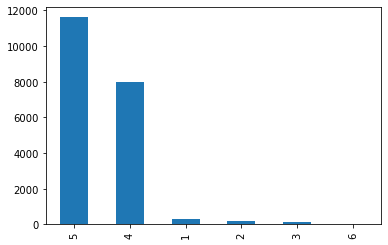

In [59]:
data30['Baps1'].value_counts().plot(kind = 'bar')

# Baps2 checking

In [60]:
data30['Baps2'].value_counts()

16    2460
17    1997
15    1973
18    1794
14    1756
19    1653
20    1532
13    1529
12    1329
21     896
11     800
10     779
22     728
9      202
23     134
3      116
4      112
8      105
5       93
2       81
1       78
6       52
7       36
27       3
25       1
Name: Baps2, dtype: int64

In [61]:
#print(data30['Baps2'].str.contains('-').sum())
#print(data30['Baps2'].str.contains('?').sum())

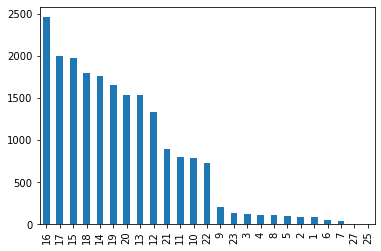

In [62]:
data30['Baps2'].value_counts().plot(kind = 'bar')

# Baps3 checking

In [63]:
data30['Baps3'].value_counts()

28    829
39    806
38    768
29    735
33    695
     ... 
15     35
3      26
1      25
67      3
64      1
Name: Baps3, Length: 62, dtype: int64

In [64]:
#print(data30['Baps3'].str.contains('-').sum())
#print(data30['Baps3'].str.contains('?').sum())

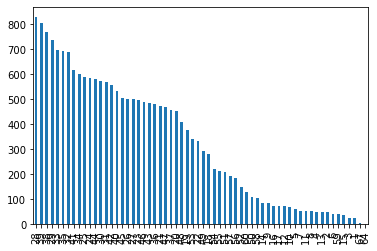

In [65]:
data30['Baps3'].value_counts().plot(kind = 'bar')

# Baps4 checking

In [66]:
data30['Baps4'].value_counts()

33     534
40     441
63     437
45     426
44     415
      ... 
119     13
123     11
120     11
117      7
121      2
Name: Baps4, Length: 127, dtype: int64

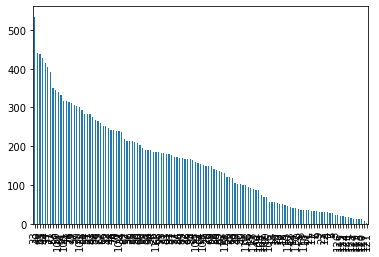

In [67]:
data30['Baps4'].value_counts().plot(kind = 'bar')

In [68]:
#print(data30['Baps4'].str.contains('-').sum())
#print(data30['Baps4'].str.contains('?').sum())

# Baps5 checking

In [69]:
data30['Baps5'].value_counts()

43     420
52     419
49     371
53     359
54     313
      ... 
189      2
205      2
202      1
194      1
196      1
Name: Baps5, Length: 207, dtype: int64

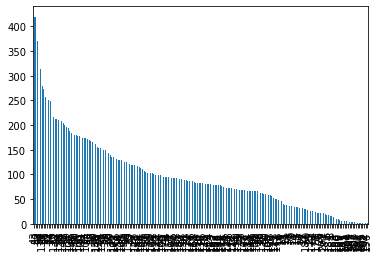

In [70]:
data30['Baps5'].value_counts().plot(kind = 'bar')

In [71]:
#print(data30['Baps5'].str.contains('-').sum())
#print(data30['Baps5'].str.contains('?').sum())

# Baps6 checking

In [72]:
data30['Baps6'].value_counts()

48     345
97     327
63     283
60     279
56     264
      ... 
260      3
254      3
258      2
259      2
255      1
Name: Baps6, Length: 261, dtype: int64

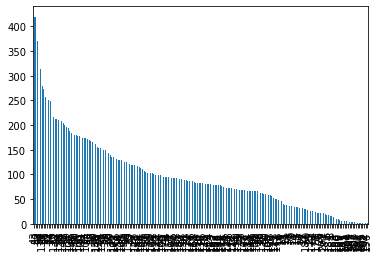

In [73]:
data30['Baps5'].value_counts().plot(kind = 'bar')

In [74]:
#print(data30['Baps6'].str.contains('-').sum())
#print(data30['Baps6'].str.contains('?').sum())

# data_set checking

In [75]:
data30['data_set'].value_counts()

subset_20    1026
subset_13    1023
subset_4     1018
subset_18    1017
subset_10    1016
subset_14    1016
subset_2     1015
subset_5     1015
subset_7     1015
subset_12    1013
subset_9     1013
subset_8     1013
subset_11    1011
subset_1     1009
subset_3     1008
subset_16    1007
subset_6     1006
subset_19    1005
subset_17     998
subset_15     995
Name: data_set, dtype: int64

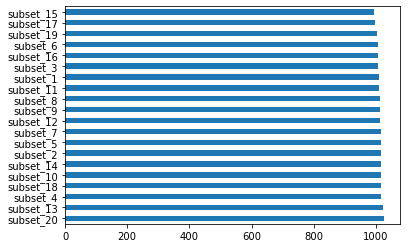

In [76]:
data30['data_set'].value_counts().plot(kind = 'barh')

In [77]:
# Checking of missing value again

data30.isnull().sum()

ST                 0
cgmlst_ST       2023
serovar_call       0
Baps1              0
Baps2              0
Baps3              0
Baps4              0
Baps5              0
Baps6              0
data_set           0
dtype: int64

# Typhimurium figure for the paper

/home/joaocarlosgomesneto/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


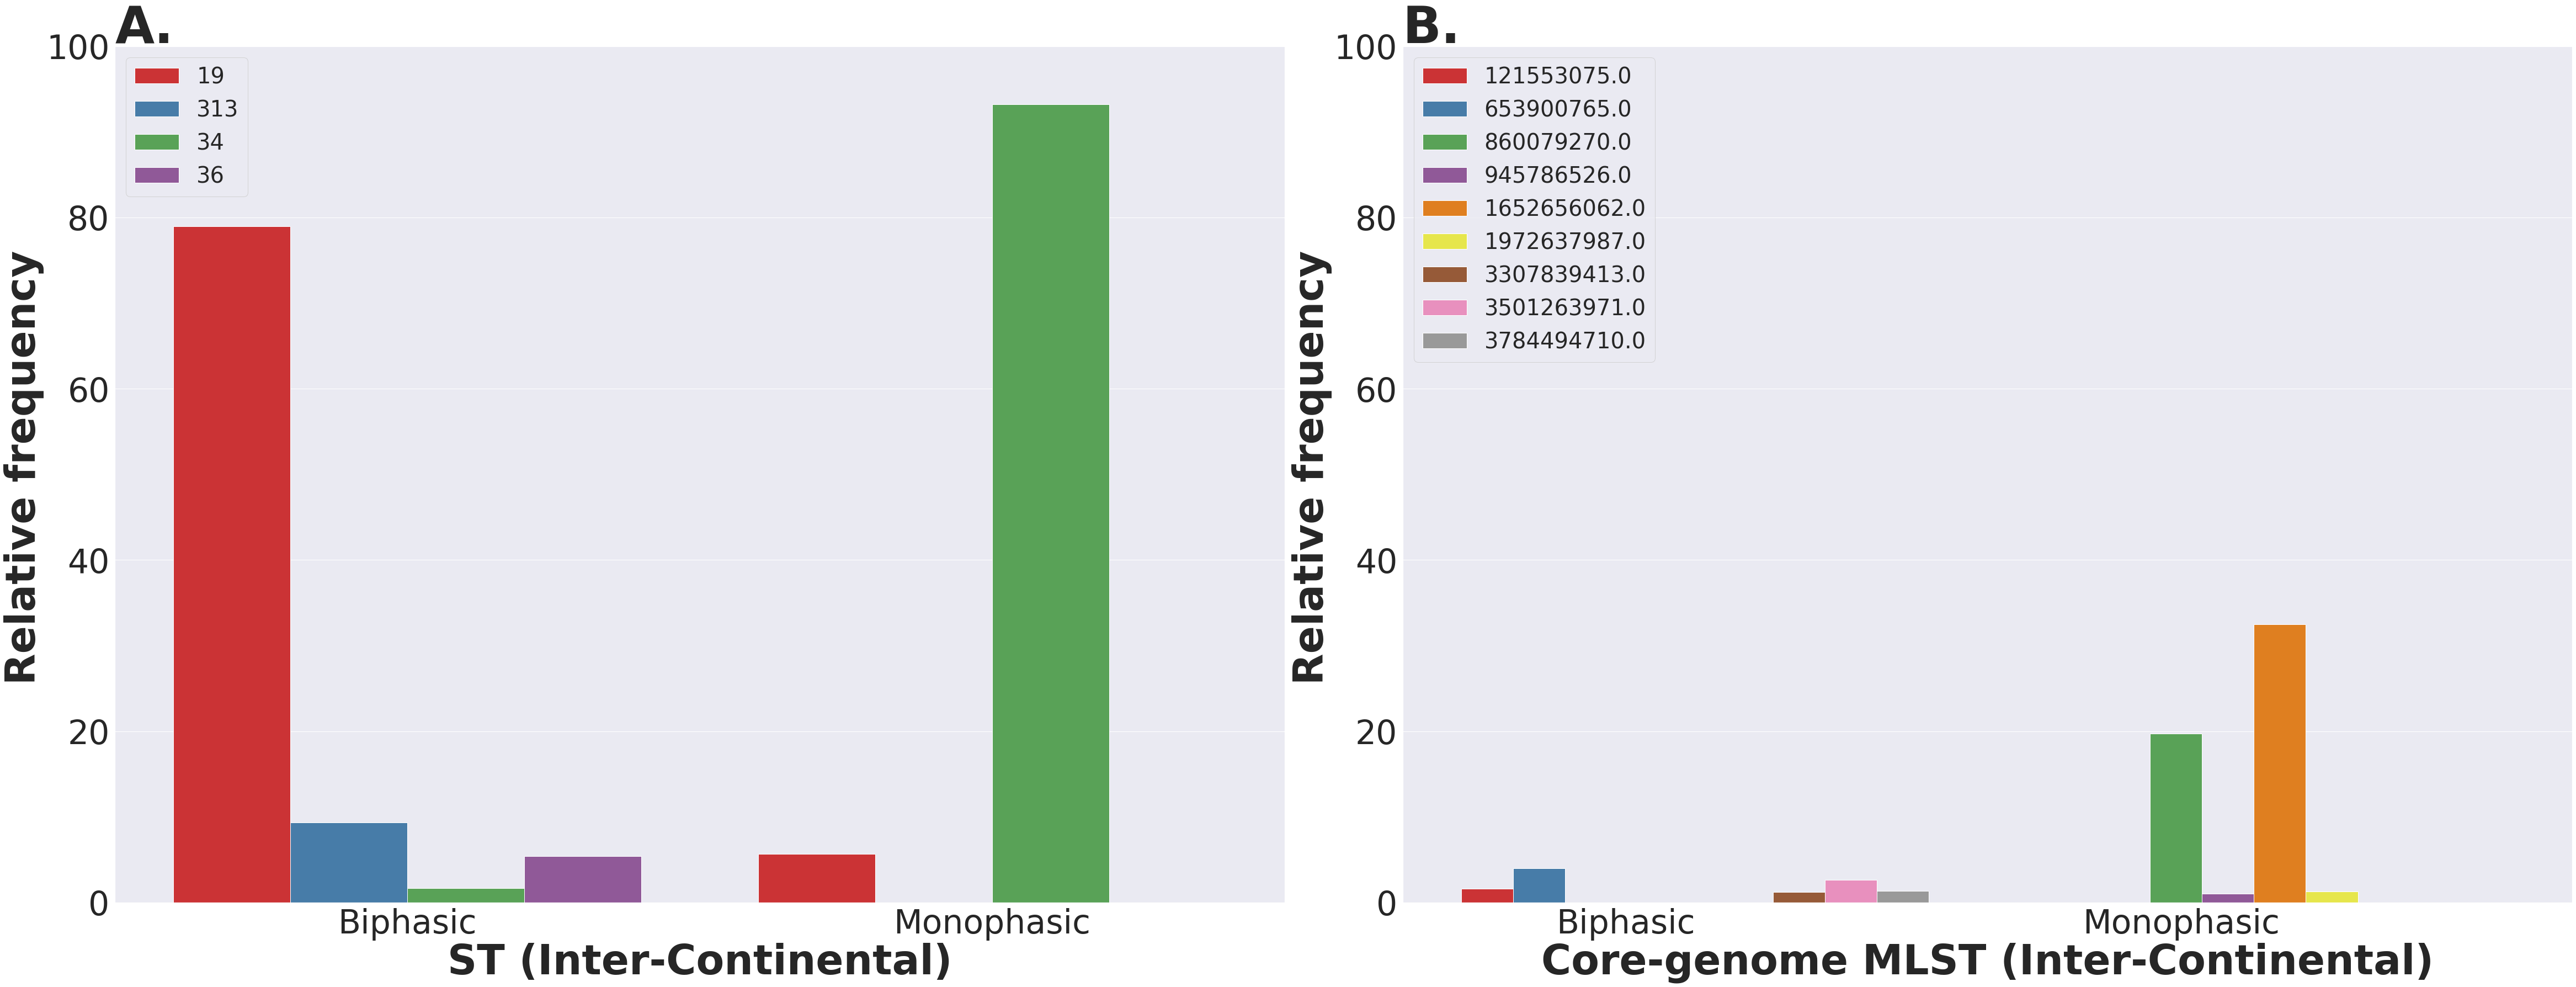

In [82]:
# Set background and number of subplots 

_ = sns.set(style="darkgrid")
fig, ax = plt.subplots(1, 2, figsize=(65, 25))

# Remove default tick marks and labels 

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

############################################################################################################

# Plot the ST distribution (We are filtering relative frequencies that >= 1%)

ax1 = fig.add_subplot(1, 2, 1)
_ = sns.set_palette('Set1', 10)

st_sample = data30[['serovar_call', 'ST']]
st_sample['ST'] = st_sample['ST'].replace('-', np.nan)
st_sample = st_sample.dropna(axis = 0, how = 'any')
a = st_sample.groupby('serovar_call')['ST'].value_counts(normalize = True)*100
a = a.to_frame()
a.columns = ['percent']
a = a.reset_index()
b = a[a['percent'] >= 1]

_ = sns.barplot(x = 'serovar_call', y= 'percent', hue = 'ST', data = b)
_ = ax1.set_xlabel('ST (Inter-Continental)', fontsize = 74, weight = 'bold')
_ = ax1.set_ylabel(' Relative frequency', fontsize = 74, weight = 'bold')
_ = ax1.tick_params(axis = 'x', which = 'major', labelsize = 60, labelrotation = 0)
_ = ax1.tick_params(axis = 'y', which = 'major', labelsize = 60)
_ = ax1.set_ylim([0,100])
_ = ax1.set_title('A.', fontsize = 92, weight = 'bold', loc = 'left')
plt.legend(fontsize = 40)

##############################################################################################################

# Plot the core-genome MLST distribution (We are filtering relative frequencies that >= 1%)

ax2 = fig.add_subplot(1, 2, 2)
_ = sns.set_palette('Set1', 30)

cst_sample = data30[['serovar_call', 'cgmlst_ST']].dropna(axis = 0, how = 'any')
a = cst_sample.groupby('serovar_call')['cgmlst_ST'].value_counts(normalize = True)*100
a = a.to_frame()
a.columns = ['percent']
a = a.reset_index()
b = a[a['percent'] >= 1]

_ = sns.barplot(x = 'serovar_call', y= 'percent', hue = 'cgmlst_ST', data = b)
_ = ax2.set_xlabel('Core-genome MLST (Inter-Continental)', fontsize = 74, weight = 'bold')
_ = ax2.set_ylabel(' Relative frequency', fontsize = 74, weight = 'bold')
_ = ax2.tick_params(axis = 'x', which = 'major', labelsize = 60, labelrotation = 0)
_ = ax2.tick_params(axis = 'y', which = 'major', labelsize = 60)
_ = ax2.set_ylim([0,100])
_ = plt.xticks(horizontalalignment='right')
_ = ax2.set_title('B.', fontsize = 92, weight = 'bold', loc = 'left')
plt.legend(fontsize = 40)

# Put a tight layout to organize the panel display evenly

_ = fig.tight_layout()

# Save figure 

#plt.savefig('Figure6.png', bbox_inches='tight')

# Save the image in memory in PNG format
png1 = io.BytesIO()
fig.savefig(png1, format="png")

# Load this image into PIL
png2 = Image.open(png1)

# Save as TIFF
png2.save("Figure_6.tiff")
png1.close()

**Fig 6.** ***Salmonella* Typhimurium (Inter-Continental) ST and Core-genome MLST relative frequency distribution**. (A-B) Relative frequencies of STs and Core-genome MLSTs between Monophasic and Biphasic populations across multiple continents (STs and Core-genome MLSTs with proportion below 1% were excluded from the graph)

In [80]:
data30.shape

(20239, 10)